In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

In [2]:
data = pd.read_csv('../data/ratings.csv')
data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [3]:
display(data.describe(include=[np.number]))
display(data.describe(exclude=[np.number])) 

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.047619,2056.619048,-0.055556
std,74.996426,23.957953,48.520783,1.007302,0.844650,1455.775827,80.664566
min,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,716.000000,0.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,3.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,User continent,Review month,Review weekday
count,504,504,504,504,504,504,504,504,504,504,504,504,504
unique,48,4,5,2,2,2,2,2,2,21,7,13,8
top,USA,Mar-May,Couples,YES,YES,NO,YES,YES,YES,Excalibur Hotel & Casino,North America,Missing,Missing
freq,217,128,214,480,480,384,384,456,480,24,232,96,96


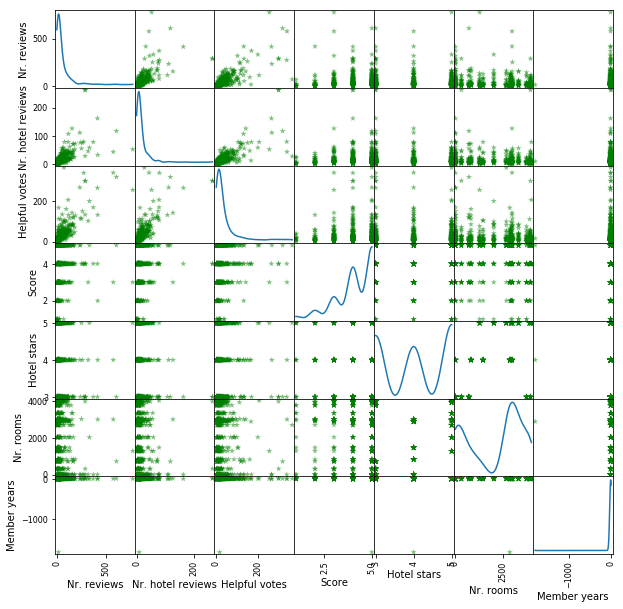

In [4]:
##Scatter matrix of features
pd.plotting.scatter_matrix(data,
                           figsize=(10,10), 
                           diagonal='kde', 
                           s=40,                            
                           alpha=0.5,
                           marker='*',
                           color='green');

> For the above dataset y-label will be the `score` and rest of the features will be used score prediction

In [5]:
## list of categorical variables which need encoding
categorical = list(data.select_dtypes(include=['object']).columns.values)
categorical

['User country',
 'Period of stay',
 'Traveler type',
 'Pool',
 'Gym',
 'Tennis court',
 'Spa',
 'Casino',
 'Free internet',
 'Hotel name',
 'User continent',
 'Review month',
 'Review weekday']

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# seasons in place of months

['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
data['Period of stay'] = data['Period of stay'].map({'Dec-Feb':'winter', 'Mar-May':'spring', 'Jun-Aug' :'summer','Sep-Nov':'autumn'})

for i in range(0, len(categorical)):
  #  data[categorical[i]] = le.fit_transform(data[categorical[i]])
    print(data[categorical[i]].unique())


['USA' 'UK' 'Canada' 'India' 'Australia' 'New Zeland' 'Ireland' 'Egypt'
 'Finland' 'Kenya' 'Jordan' 'Netherlands' 'Syria' 'Scotland' 'South Africa'
 'Swiss' 'United Arab Emirates' 'Hungary' 'China' 'Greece' 'Mexico'
 'Croatia' 'Germany' 'Malaysia' 'Thailand' 'Phillippines' 'Israel' 'India '
 'Belgium' 'Puerto Rico' 'Switzerland' 'Norway' 'France' 'Spain'
 'Singapore' 'Brazil' 'Costa Rica' 'Iran' 'Saudi Arabia' 'Honduras'
 'Denmark' 'Taiwan' 'Hawaii' 'Kuwait' 'Czech Republic' 'Japan' 'Korea'
 'Italy']
['winter' 'spring' 'summer' 'autumn']
['Friends' 'Business' 'Families' 'Solo' 'Couples']
['NO' 'YES']
['YES' 'NO']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']
['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 

In [7]:
#Encoding categorical features with numbers
for i in range(0, len(categorical)):
    data[categorical[i]] = le.fit_transform(data[categorical[i]])
    
data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,46,11,4,13,5,3,3,0,1,0,0,1,1,2,3,3773,4,9,4,5
1,46,119,21,75,3,3,0,0,1,0,0,1,1,2,3,3773,4,3,4,0
2,46,36,9,25,5,1,2,0,1,0,0,1,1,2,3,3773,4,2,3,3
3,45,14,7,14,4,1,3,0,1,0,0,1,1,2,3,3773,2,6,3,0
4,3,5,5,2,4,1,4,0,1,0,0,1,1,2,3,3773,4,7,7,6


**Prepare train and test sets**

In [8]:
## prepare train and test labels
from sklearn.model_selection import train_test_split
X= data.drop(['Score'], axis=1) ## remove score label from data
y = data['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Recursive feature elimination (RFE) to select features by recursively considering smaller and smaller sets of features**

In [9]:
##Applying random forest classifier on features to class

## Using feature selection pipeline and classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge


rfe = RFE(estimator = Ridge(), n_features_to_select = 12)
rfe.fit(X_train, y_train)
feature_list = pd.DataFrame({'col':list(X_train.columns.values),'sel':list(rfe.support_ *1)})
print("*Most contributing features in Score*")

print(feature_list[feature_list.sel==1].col.values)

*Most contributing features in Score*
['Period of stay' 'Traveler type' 'Pool' 'Gym' 'Tennis court' 'Spa'
 'Casino' 'Free internet' 'Hotel name' 'Hotel stars' 'User continent'
 'Review weekday']


In [10]:
## Subset train data based on selected features
X_sel = pd.DataFrame(X_train, columns=(feature_list[feature_list.sel==1].col.values))
X_sel_t = pd.DataFrame(X_test, columns=(feature_list[feature_list.sel==1].col.values))

**Using selected features to fit the model for Score prediction**

> Using random forest classifier and kNN to predict score

**Using Random forest**

In [11]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_sel, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

**Using KNN for score prediction**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_sel, y_train) 
knn.score(X_sel_t, y_test),clf.score(X_sel_t, y_test)


(0.43421052631578949, 0.46052631578947367)

**Random Forest gave better score than KNN on test data**
* Using Random forest for `Score` Prediction

In [13]:
p = (list(clf.predict(X_sel_t)))
len(p)

152

In [16]:
Predictions = X_sel_t
Predictions['Original_Score']= y_test
Predictions['pred_score'] = p
Predictions.head()


,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,User continent,Review weekday,Original_Score,pred_score
173,1,2,1,1,0,1,1,1,12,5,4,0,5,5
274,2,1,1,1,0,1,1,1,3,5,2,3,5,5
489,1,1,1,1,0,1,1,1,14,4,4,6,4,4
72,3,0,1,1,1,1,1,1,15,4,2,4,3,5
305,0,4,1,1,0,1,1,1,6,3,3,1,5,4


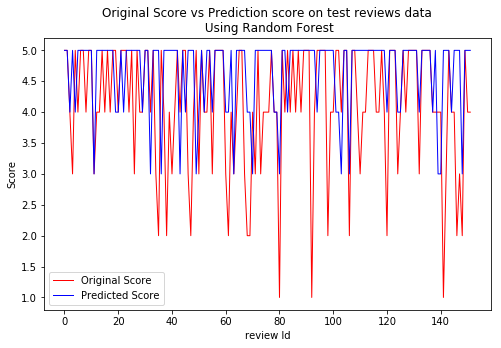

In [26]:
plt.figure(figsize=(8, 5))
ax = plt.subplot()
d = list(range(0,len(Predictions)))
p1 = plt.plot(d,Predictions['Original_Score'],'r-', label="Original Score", linewidth= 1 )#,data['gamma'],data['test_err'],'b-')
p2 = plt.plot(d,Predictions['pred_score'],'b-', label="Predicted Score", linewidth= 1)
ax.set_title('Original Score vs Prediction score on test reviews data\n Using Random Forest')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel('review Id')
ax.set_ylabel('Score')
plt.show()

**Summary**

The best prediction score achived using Random Forest with 12 features out of 19, is **46%** which is fairly low as the data is not so rich in my opinion

However Random Forest performed better than KNN in score prediction